<a href="https://colab.research.google.com/github/shmedis/VSCode_URFU/blob/main/%D0%A8%D0%BC%D0%B5%D0%BB%D0%B5%D0%B2_%D0%98%D1%82%D0%BE%D0%B3%D0%BE%D0%B2%D1%8B%D0%B9_%D0%BF%D1%80%D0%BE%D0%B5%D0%BA%D1%82.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Импорт всех необходимых библиотек**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import LocalOutlierFactor
pd.set_option("display.max_rows", 20)
pd.set_option("display.max_columns", 20)
pd.set_option("display.precision", 4)
pd.set_option("plotting.backend", "matplotlib")

# 1. Исследовательский анализ данных (exploratory data analysis - EDA)

## 1.1 Словесное описание признаков

<b><p>data.csv</p></b>
<ul>
<li>id: id транзакции </li>
<li>timestamp: дата продажи (транзакции) </li>
<li>full_sq: общая площадь  </li>
<li>life_sq: жилая площадь  </li>
<li>floor: этаж  </li>
<li>max_floor: количество этажей в здании </li>
<li>material: материал, из которого изговолены стены  </li>
<li>build_year: год строительства </li>
<li>num_room: количество жилых комнат </li>
<li>kitch_sq: площадь кухни </li>
<li>full_all: количество населения в регионе </li>
<li> state: жилищные условия </li>
<li>sub_area: название территории </li>
<li>price_doc: цена квартиры (целевая переменная) </li>
</ul>

<b><p>macro.csv</p></b>
<ul>
<li>timestamp : дата, на которую актуальны макроэкономические показатели </li>
<li>salary : средняя зарплата в регионе </li>
<li>fixed_basket: стоимость потребительской корзины </li>
<li>rent_price_3room_eco: стоимость аренды 3-х комнатного жилья эконом-класса </li>
<li>rent_price_2room_eco: стоимость аренды 2-х комнатного жилья эконом-класса </li>
<li>rent_price_1room_eco: стоимость аренды 1-но комнатного жилья эконом-класса </li>
<li>average_life_exp: средняя продолжительность жизни в регионе </li>
</ul>

## 1.2 Загрузка данных общее описание набора данных

In [29]:
PATH_base = "https://raw.githubusercontent.com/aksenov7/Kaggle_competition_group/master/data.csv"
PATH_add = "https://raw.githubusercontent.com/aksenov7/Kaggle_competition_group/master/data_macro.csv"
df = pd.read_csv(PATH_base)
macro =  pd.read_csv(PATH_add)

### 1.2.1 Базовый датасет

Вывести пример данных (первые строки и случайные строки)

In [4]:
df.head(3)

,id,timestamp,full_sq,life_sq,floor,state,max_floor,material,build_year,num_room,kitch_sq,full_all,sub_area,price_doc
0,8059,2013-05-21,11,11.0,2.0,3.0,5.0,2.0,1907.0,1.0,12.0,75377,Hamovniki,2750000
1,8138,2013-05-25,53,30.0,10.0,3.0,16.0,1.0,1980.0,2.0,8.0,68630,Lianozovo,9000000
2,8156,2013-05-27,77,41.0,2.0,1.0,17.0,6.0,2014.0,3.0,12.0,9553,Poselenie Voskresenskoe,7011550


In [5]:
df.sample(3)

,id,timestamp,full_sq,life_sq,floor,state,max_floor,material,build_year,num_room,kitch_sq,full_all,sub_area,price_doc
18731,15690,2014-03-04,38,NaN,8.0,NaN,17.0,1.0,NaN,1.0,1.0,17790,Poselenie Vnukovskoe,4305303
12803,25349,2014-11-26,45,16.0,10.0,1.0,1.0,1.0,2014.0,1.0,1.0,78810,Koptevo,8308300
16828,30424,2015-06-25,37,18.0,2.0,1.0,24.0,6.0,2017.0,1.0,8.0,76284,Nagatinskij Zaton,5759732


Размер набора данных

In [6]:
df.size

264124

Описание типов данных по признакам

In [7]:
df.dtypes

id              int64
timestamp      object
full_sq         int64
life_sq       float64
floor         float64
state         float64
max_floor     float64
material      float64
build_year     object
num_room      float64
kitch_sq      float64
full_all        int64
sub_area       object
price_doc       int64
dtype: object

Базовые статистики по признакам

In [8]:
df.describe()

,id,full_sq,life_sq,floor,state,max_floor,material,num_room,kitch_sq,full_all,price_doc
count,18866.0000,18866.0000,17291.0000,18838.0000,15505.0000,17445.0000,17445.0000,17445.0000,17445.0000,1.8866e+04,1.8866e+04
mean,18799.7886,53.9409,34.2592,7.2937,2.2013,12.4233,1.8901,1.9348,7.2064,1.5972e+05,7.5824e+06
std,7082.4287,44.1162,59.9446,5.1912,0.8528,6.2798,1.5061,0.8642,26.9816,3.0435e+05,4.9838e+06
min,9.0000,0.0000,0.0000,0.0000,1.0000,0.0000,1.0000,0.0000,0.0000,2.5460e+03,1.0000e+05
25%,13513.2500,38.0000,20.0000,3.0000,2.0000,9.0000,1.0000,1.0000,5.0000,4.8439e+04,5.1000e+06
50%,19043.5000,49.0000,30.0000,6.0000,2.0000,12.0000,1.0000,2.0000,7.0000,8.7713e+04,6.6855e+06
75%,24748.7500,63.0000,43.0000,10.0000,3.0000,17.0000,2.0000,3.0000,9.0000,1.2535e+05,8.9000e+06
max,30473.0000,5326.0000,7478.0000,77.0000,33.0000,57.0000,6.0000,19.0000,2014.0000,1.7167e+06,9.5122e+07


Выводы текстом, что вы можете сказать по каждому признаку, на основе базовых статистик

- Почти по всем параметрам есть квартиры с некорректными значениями, как в большую, так и в меньшую (0) сторону
- По колонкам life_sq, state, max_floor, material, num_room, kitch_sq есть квартиры с пропусками

Какие признаки вы считаете полезными для предсказания цены квартиры, а какие по вашему мнению можно убрать. Почему?

## Признаки
### Полезные признаки
- full_sq
- floor и max_floor
- num_room
- build_year
- sub_area
- state

### Признаки, которые можно убрать
- life_sq
- material
- kitch_sq




Есть ли пропуски в данных? В каких столбцах? Какой процент по каждому столбцу?

In [40]:
data = {}

def miss(i):
  data[i] = round(df[df[i].isna()].shape[0] / df.shape[0] * 100, 2)

for i in df.columns:
  miss(i)

miss_data = pd.Series(data)
miss_data

id             0.00
timestamp      0.00
full_sq        0.00
life_sq        8.35
floor          0.15
state         17.82
max_floor      7.53
material       7.53
build_year    10.60
num_room       7.53
kitch_sq       7.53
full_all       0.00
sub_area       0.00
price_doc      0.00
dtype: float64

Есть ли аномальные данные в стллбцах? Если да, то укажите на них и объясните, почему считаете аномальными

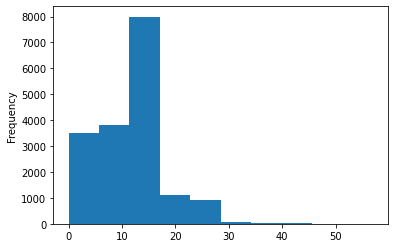

In [20]:
df["max_floor"].plot(kind = 'hist')

### 1.2.2 Макро показатели

Вывести пример данных (первые строки и случайные строки)

Размер набора данных

Описание типов данных по признакам

Базовые статистики по признакам

Выводы текстом, что вы можете сказать по каждому признаку, на основе базовых статистик

Какие признаки вы считаете полезными для предсказания цены квартиры, а какие по вашему мнению можно убрать. Почему?

Есть ли пропуски в данных? В каких столбцах? Какой процент по каждому столбцу?

Есть ли аномальные данные в стллбцах? Если да, то укажите на них и объясните, почему считаете аномальными

## 1.3 Замените все ранее найденные ошибочные данные на None. Заполните все пропуски в данных: которые были и которые появились. Используйте как стратегии изученные на занятии, так и логику, которая вытекает из самих данных

### 1.3.1 Главный набор данных

### 1.3.2 Набор с макропоказателями

## 1.4 Обогатите основной набор данных данными из макропоказателей и поместите в переменную `df_full`

## 1.5 Проверьте данные на наличие выбросов. По каждому столбцу. Напишите своё мнение: нужно ли в каждой из ситуаций обрабатывать выбросы, или можно оставить. Если нужно обработать, то примените один из изученных подходов, либо предложите свой

### 1.5.1 Главный набор данных

### 1.5.2 Набор с макропоказателями

## 1.6 Создайте не менее 5 новых признаков на основе существующих данных. Опишите текстом обоснование создания каждой. Признаки должны привносить некую новую информацию для понимания цены квартиры

## 1.7 Провести визуальный анализ всех признаков

Ко всем графикам писать выводы текстом. Что вы видите, почему построили именно такую диаграмму

### 1.7.1 Анализ признаков по отдельности (где нужно делать группировки, преобразования категориальных типов данных к числовым, смотреть в разрезе других категориальных признаков)

### 1.7.2 Анализ совместного влияния признаков и их влияния на целевой признак